In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 2D case

In [5]:
seg_2d_orig = sitk.ReadImage(r'Z:/grodriguez/CardiacOCT/data-original/segmentations-ORIGINALS/NLD-ISALA-0076.nii.gz')
seg_2d_pixel_data_orig = sitk.GetArrayFromImage(seg_2d_orig)

In [6]:
frame = 195

unique2, counts = np.unique(seg_2d_pixel_data_orig[frame,:,:], return_counts=True)
a = np.asarray((unique2, counts)).T
print(a)

[[     0 795777]
 [     1  89716]
 [     2  40954]
 [     3  42157]
 [     4  56854]
 [     6   7682]
 [     7  13934]
 [     9   1502]]


In [4]:
frame_sample_data = seg_2d_pixel_data_orig[frame,:,:]

In [8]:
unique, counts = np.unique(seg_2d_pixel_data_orig[frame,:,:], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 795777]
 [     1  89716]
 [     2  40954]
 [     3  42157]
 [     4  56854]
 [     6   7682]
 [     7  13934]
 [     9   1502]]


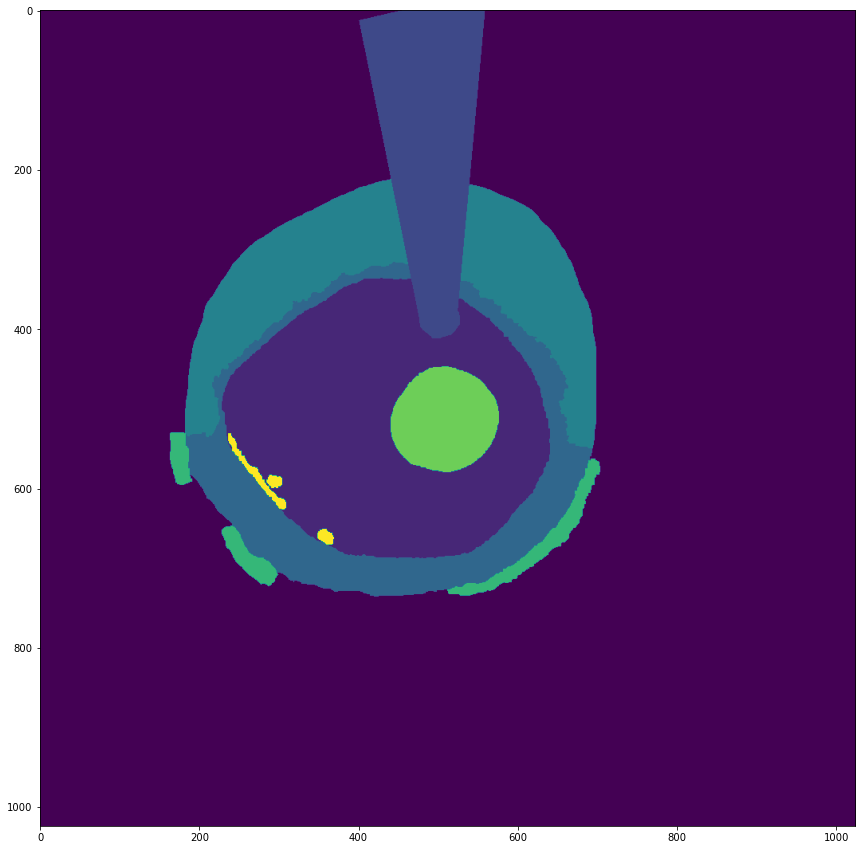

In [10]:
fig, axes = plt.subplots(1, figsize=(15,15))

axes.imshow(seg_2d_pixel_data_orig[frame,:,:])

In [2]:
shapes_dict = {}

for file in os.listdir(r'Z:/grodriguez/CardiacOCT/data-original/segmentations ORIGINALS'):

    img_first_frame = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:/grodriguez/CardiacOCT/data-original/segmentations ORIGINALS/{}'.format(file)))[0,:,:]
    shapes_dict[file] = img_first_frame.shape

    

In [3]:
keys = [i for i in shapes_dict.keys() if shapes_dict[i] == (1024, 1024)]

In [28]:
seg_2d = sitk.ReadImage(r'Z:/grodriguez/CardiacOCT/data-2d/nnUNet_raw_data/Task503_CardiacOCT/labelsTr/NLDRADB0010_1_frame360_075.nii.gz')

In [17]:
unique, counts = np.unique(seg_2d_pixel_data[0], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 392726]
 [     1  34600]
 [     2  37321]
 [     3  15338]
 [     6   8961]
 [     7   6670]]


In [7]:
seg_2d_pixel_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [51]:
seg_2d_orig = sitk.ReadImage(r'Z:/grodriguez/CardiacOCT/data-original/segmentations ORIGINALS/NLD-RADB-0094-LAD.nii.gz')
seg_2d_pixel_data_orig = sitk.GetArrayFromImage(seg_2d_orig)

In [48]:
seg_2d_pred = sitk.ReadImage(r'Z:/grodriguez/CardiacOCT/data-2d/nnUNet_raw_data/Task503_CardiacOCT/labelsTr/NLDRADB0094_1_frame400_059.nii.gz')
seg_2d_pixel_data_pred = sitk.GetArrayFromImage(seg_2d_pred)

In [49]:
unique, counts = np.unique(seg_2d_pixel_data_pred[0], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 282143]
 [     1 126377]
 [     2  25134]
 [     3  45167]
 [     6  10390]
 [     7   6405]]


In [52]:
unique, counts = np.unique(seg_2d_pixel_data_orig[400,:,:], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 280579]
 [     1 126377]
 [     2  26283]
 [     3  45579]
 [     4      3]
 [     6  10390]
 [     7   6405]]


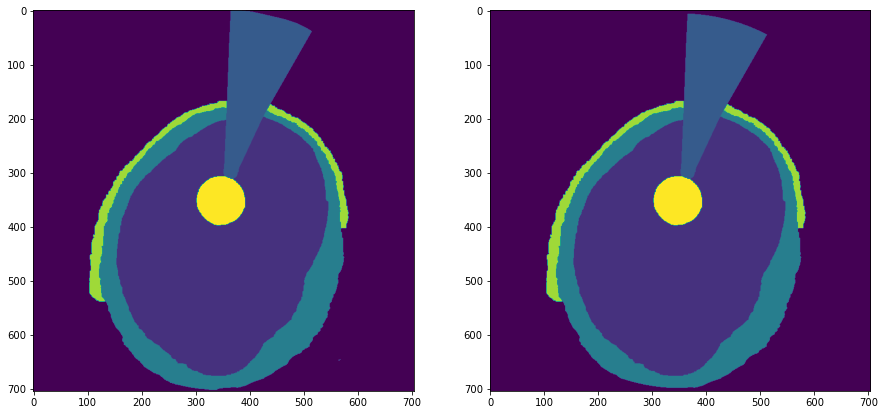

In [53]:
fig, axes = plt.subplots(1,2, figsize=(15,15))

axes[0].imshow(seg_2d_pixel_data_orig[400,:,:])
axes[1].imshow(seg_2d_pixel_data_pred[0])

In [ ]:
unique, counts = np.unique(seg_2d_pixel_data_pred[0], return_counts=True)
print(np.asarray((unique, counts)).T)

In [44]:
seg_2d_pred.GetSpacing()

(999.0, 1.0, 1.0)

## 3D case

In [14]:
seg_3d = sitk.ReadImage(r'Z:/grodriguez/CardiacOCT/data-3d/nnUNet_raw_data/Task505_CardiacOCT/labelsTr/EST-NEMC-0027_1_split1_001.nii.gz')
seg_3d_data = sitk.GetArrayFromImage(seg_3d)

seg_3d_orig = sitk.ReadImage(r'Z:/grodriguez/CardiacOCT/data-original/segmentations-ORIGINALS/EST-NEMC-0027-RCA.nii.gz')
seg_3d_orig_data = sitk.GetArrayFromImage(seg_3d_orig)

In [22]:
frame = 13
unique, counts = np.unique(seg_3d_data[:,:,frame], return_counts=True)
print(np.asarray((unique, counts)).T)

#unique, counts = np.unique(seg_3d_orig_data[frame,:,:], return_counts=True)
#print(np.asarray((unique, counts)).T)

[[     0 365805]
 [     1  55292]
 [     2  16594]
 [     3  35906]
 [     6  15301]
 [     7   6718]]


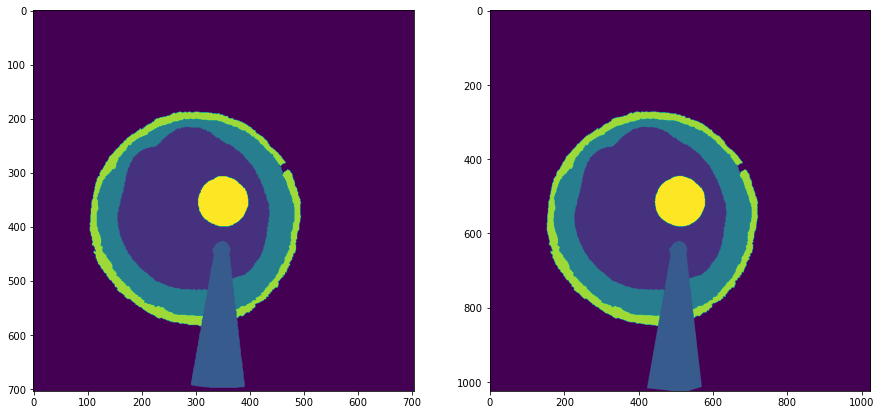

In [23]:
fig, axes = plt.subplots(1,2, figsize=(15,15))

axes[0].imshow(seg_3d_data[:,:,frame])
axes[1].imshow(seg_3d_orig_data[40,:,:])

## Save spacing

In [4]:
spacing_pd = pd.DataFrame(columns = ['pullback', 'spacing'])

path = 'Z:/grodriguez/CardiacOCT/data-original/extra-segmentations-ORIGINALS 3'
path1 = 'Z:/grodriguez/CardiacOCT/data-original/segmentations-ORIGINALS'
path2 = 'Z:/grodriguez/CardiacOCT/data-original/extra-segmentations-ORIGINALS'
path3 = 'Z:/grodriguez/CardiacOCT/data-original/extra-segmentations-ORIGINALS 2'

list_paths = [path1, path2, path3]

for i in os.listdir(path):

    seg = sitk.ReadImage(os.path.join(path, i))
    seg_data = sitk.GetArrayFromImage(seg)

    data_list = []
    data_list.append(i.split('.')[0])
    data_list.append(seg_data.shape)

    spacing_pd = spacing_pd.append(pd.Series(data_list, index=spacing_pd.columns[:len(data_list)]), ignore_index=True)

In [5]:
spacing_pd.to_excel('Z:/grodriguez/CardiacOCT/excel-files/spacing_data.xlsx')